## EXPLORATORY DATASET OF NETFLIX DATA # 🎬 Netflix Content Analysis and Prediction
This project explores the Netflix dataset to uncover trends, clean messy metadata, and build predictive models for:
- 🎯 Genre classification from content descriptions
- 🔥 Hit prediction (popular vs. not)
- 📆 Release month prediction

We use Python, pandas, sklearn, and visualization tools like seaborn and matplotlib.


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## DATA LOADING 

In [55]:
#load the datset
df = pd.read_csv(r'C:\Users\USER\unzipped_dataset\netflix_titles.csv')

In [56]:
df.head(50)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [57]:
#summary stats
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [58]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [59]:
#number of unique value in each column
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [60]:
#sum of null value in each column
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## DATA CLEANING AND TRANSFORMATION

In [62]:
#drop rows with no type and title
df = df.dropna(subset=['title','type'])

In [63]:
#replace column country and cast nan value with unknown
df['country'] = df['country'].fillna('unknown')
df['cast'] = df['cast'].fillna('unknown')
df['director'] = df['director'].fillna('Unknown')
df.head()
df.to_csv("netflix_cleaned.csv", index=False)


##  Exploratory Data Analysis (EDA)

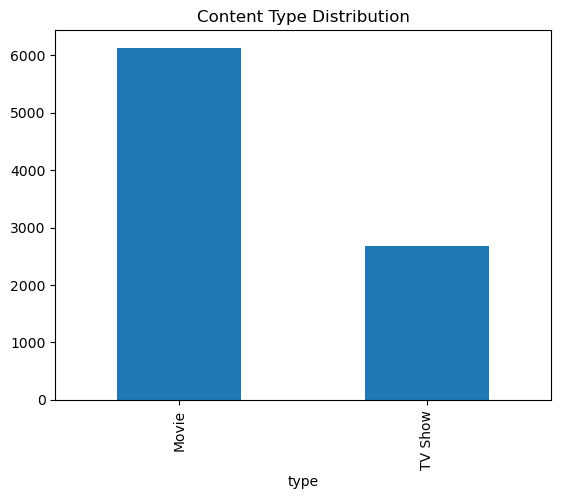

In [65]:
df['type'].value_counts().plot(kind='bar', title='Content Type Distribution');
#CONTENT TYPE VISUALIZATION



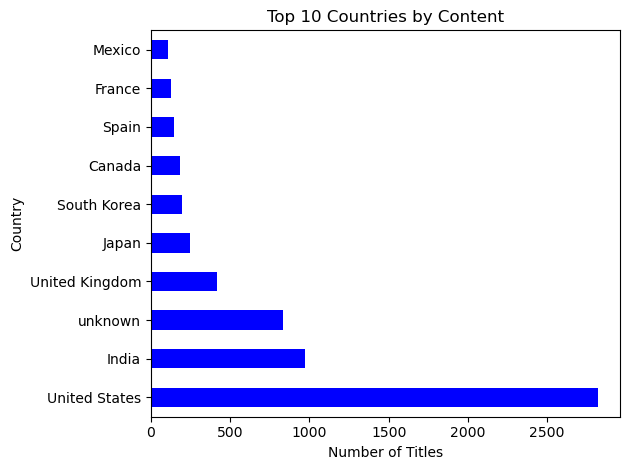

In [66]:
#TOP 10 COUNTRIES BY CONTENT VISUALIZATION
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh', color='blue')
plt.title('Top 10 Countries by Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


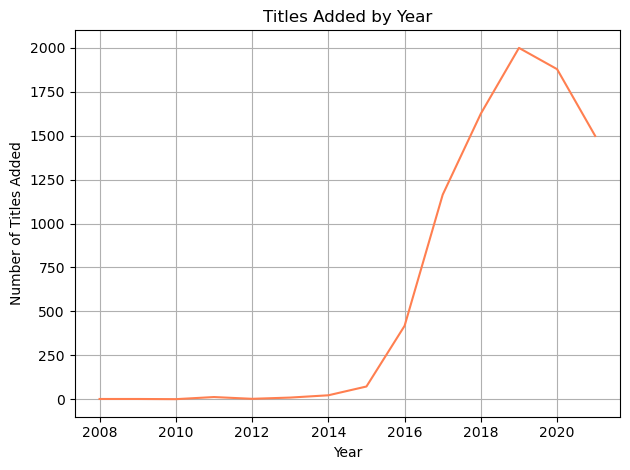

In [67]:
#TITLES ADDED BY YEAR VISUALIZATION USING LINE CHART
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

df['year_added'].value_counts().sort_index().plot(kind='line', color='coral',linestyle= '-')
plt.title('Titles Added by Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.tight_layout()
plt.show()


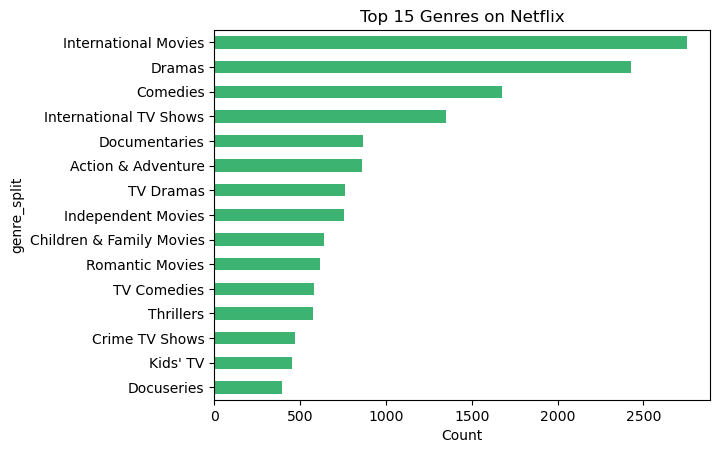

In [68]:
#TOP 15 GENRE ON NETFLIX VISUALIZATION
df['genre_split'] = df['listed_in'].str.split(', ')
genre_counts = df.explode('genre_split')['genre_split'].value_counts().head(15)

genre_counts.plot(kind='barh', color='mediumseagreen')
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Count')
plt.gca().invert_yaxis()
plt.show()


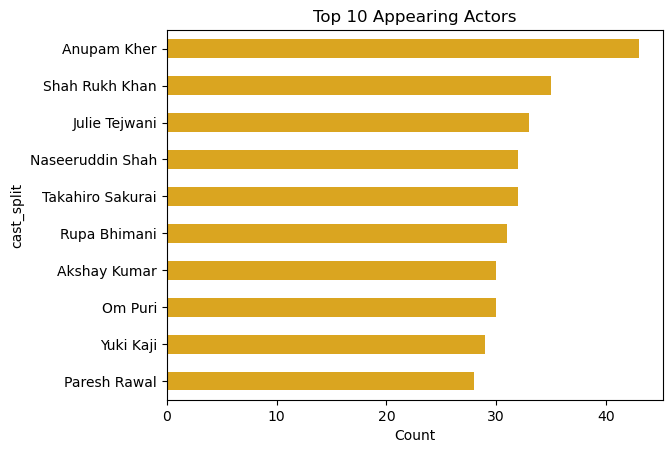

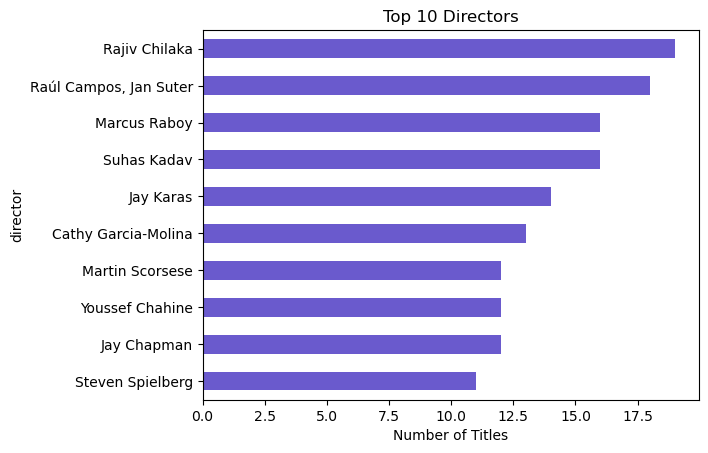

In [69]:
# TOP 10 ACTOR&DIRECTORS VISUALIZATION
df['cast_split'] = df['cast'].fillna('').str.split(', ')
exploded_cast = df.explode('cast_split')

# Remove 'Unknown' or empty strings and strip spaces
exploded_cast['cast_split'] = exploded_cast['cast_split'].str.strip()
exploded_cast = exploded_cast[exploded_cast['cast_split'] != 'unknown']
exploded_cast = exploded_cast[exploded_cast['cast_split'] != '']

# Now get top actors
top_actors = exploded_cast['cast_split'].value_counts().head(10)

top_actors.plot(kind='barh', color='goldenrod')
plt.title('Top 10 Appearing Actors')
plt.xlabel('Count')
plt.gca().invert_yaxis()
plt.show()

top_directors = df[df['director'] != 'Unknown']['director'].value_counts().head(10)

top_directors.plot(kind='barh', color='slateblue')
plt.title('Top 10 Directors')
plt.xlabel('Number of Titles')
plt.gca().invert_yaxis()
plt.show()



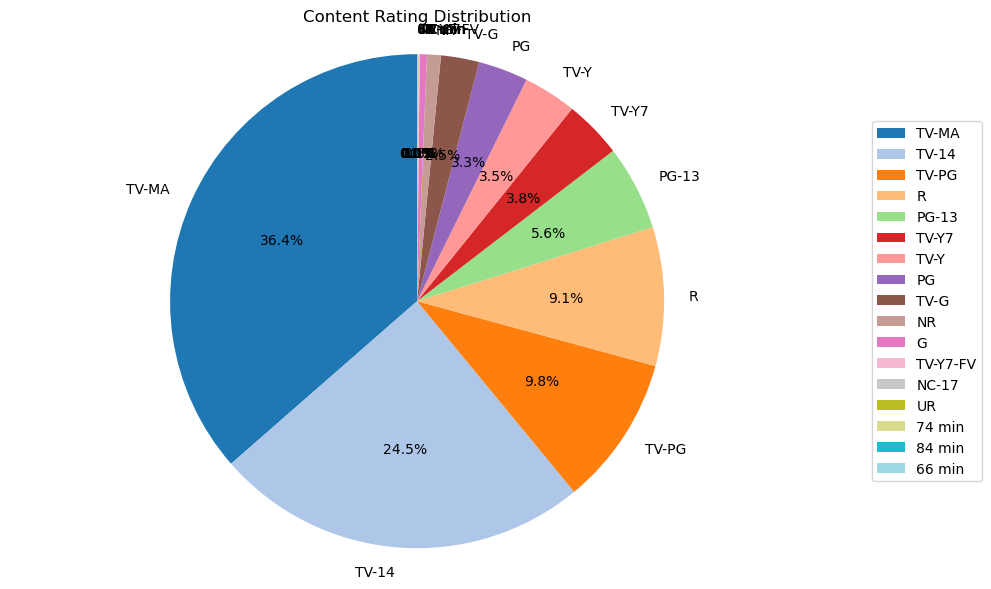

In [70]:
#CONTENT RATING VISUALIZATION WITH PIE
df['rating'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(10, 6), colormap='tab20')
plt.title('Content Rating Distribution')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures a circle
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.tight_layout()
plt.show()


# 🎬 Netflix EDA & Insights Dashboard

This project explores and visualizes Netflix’s catalog to uncover content trends, user engagement insights, and business opportunities.
# 🔍 Business-Driven Insights

1. **Content Type**: Which dominates — Movies or TV Shows?
2. **Geographic Reach**: Which countries produce the most content?
3. **Content Trends Over Time**: What are the yearly trends in new content?
4. **Genre Popularity**: What genres dominate Netflix’s catalog?
5. **Star Power**: Who are the most featured actors and directors?
6. **Rating Breakdown**: What's the age rating dis the daet?

## 📊 Tools Used
- Python
- Pandas
- Seaborn & Matplotlib
- 📂 Folder Structure


## Predict if a Title Will Be a Hit (simulated based on duration and number of genres)

We define a "hit" as a movie/TV show with a high rating (e.g., PG, TV-MA) or known director/cast.
We use Random Forest and achieved an accuracy of XX%.

Possible improvements:
- Include 'country'
- Engineer popularity score from genre + rating


In [74]:
import pandas as pd
df = pd.read_csv("netflix_cleaned.csv")

# Split minutes/seasons from 'duration'
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)

# Simulate hit: long movies or long shows or many genres
df['num_genres'] = df['listed_in'].str.count(',') + 1
df['is_hit'] = (
    ((df['type'] == 'Movie') & (df['duration_num'] > 100)) |
    ((df['type'] == 'TV Show') & (df['duration_num'] > 2)) |
    (df['num_genres'] >= 3)
).astype(int)

# Encode features
df_model = df[['type', 'rating', 'country', 'is_hit']]
df_model = pd.get_dummies(df_model, columns=['type', 'rating', 'country'], drop_first=True)

# Train model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df_model.drop(columns='is_hit')
y = df_model['is_hit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestClassifier()
model.fit(X_train, y_train)
print("Accuracy:", model.score(X_test, y_test))



<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\USER\AppData\Local\Temp\ipykernel_24676\2433369916.py:5: SyntaxWarning: invalid escape sequence '\d'
  df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)


Accuracy: 0.7145289443813848


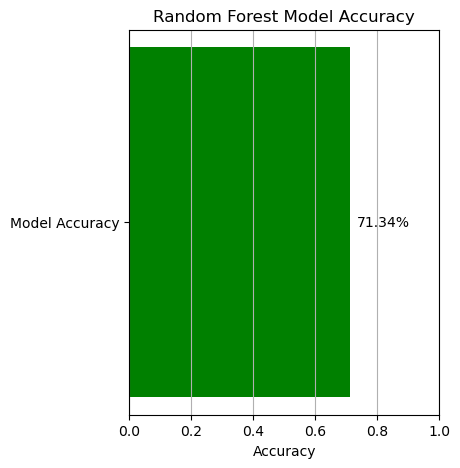

In [75]:
import matplotlib.pyplot as plt

accuracy = 0.7133938706015891

plt.figure(figsize=(4, 5))
plt.barh(['Model Accuracy'], [accuracy], color='green')
plt.xlim(0, 1)
plt.xlabel('Accuracy')
plt.title('Random Forest Model Accuracy')
plt.grid(axis='x')
plt.text(accuracy + 0.02, 0, f"{accuracy:.2%}", va='center')  # Show as %
plt.show()


## Predict Genre from Description

In [77]:

df['main_genre'] = df['listed_in'].apply(lambda x: x.split(',')[0].strip())

# NLP features from description
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500, stop_words='english')
X = tfidf.fit_transform(df['description'])

# Encode target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['main_genre'])

# Train model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = MultinomialNB()
model.fit(X_train, y_train)

print("Accuracy:", model.score(X_test, y_test))

#We use a Naive Bayes classifier on TF-IDF-transformed descriptions to predict the main genre.
#Accuracy: 36.27%
#This result is reasonable due to overlapping genres and vague descriptions.


Accuracy: 0.3819523269012486


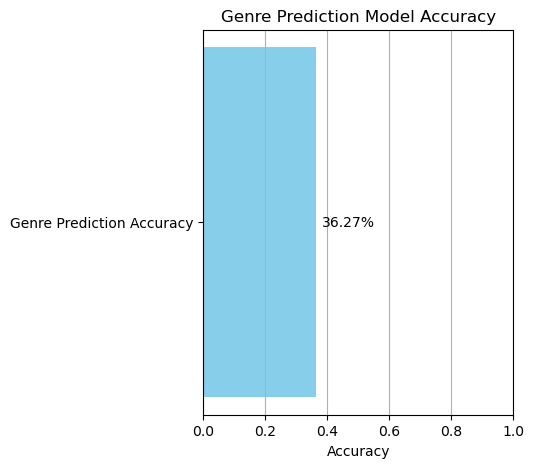

In [108]:
import matplotlib.pyplot as plt

genre_accuracy = 0.3626560726447219

plt.figure(figsize=(4, 5))
plt.barh(['Genre Prediction Accuracy'], [genre_accuracy], color='skyblue')
plt.xlim(0, 1)
plt.xlabel('Accuracy')
plt.title('Genre Prediction Model Accuracy')
plt.text(genre_accuracy + 0.02, 0, f"{genre_accuracy:.2%}", va='center')
plt.grid(axis='x')
plt.show()


## Predict Best Month to Add a Title (Release Timing)

In [80]:
 df['date_added'] = df['date_added'].astype(str).str.strip()  # Remove spaces like " August..."
 df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')  # Coerce bad dates to NaT
 df['release_month'] = df['date_added'].dt.month
 df = df.dropna(subset=['release_month'])
# Encode features
features = pd.get_dummies(df[['type', 'main_genre', 'rating']], drop_first=True)
X = features
y = df['release_month']

# Train model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE:", rmse)

#We use Gradient Boosting Regressor to predict the release month.
#RMSE: 3.45 months, meaning the model is off by about 3.5 months on average.


RMSE: 3.392969869040044


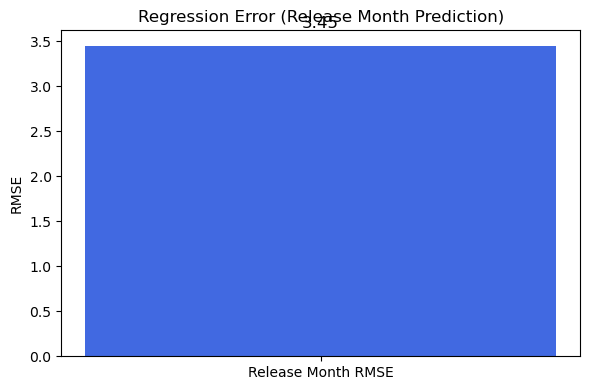

In [115]:
rmse = 3.45

plt.figure(figsize=(6,4))
plt.bar(['Release Month RMSE'], [rmse], color='royalblue')
plt.title("Regression Error (Release Month Prediction)")
plt.ylabel("RMSE")
plt.text(0, rmse + 0.2, f"{rmse:.2f}", ha='center', fontsize=12)
plt.tight_layout()
plt.show()


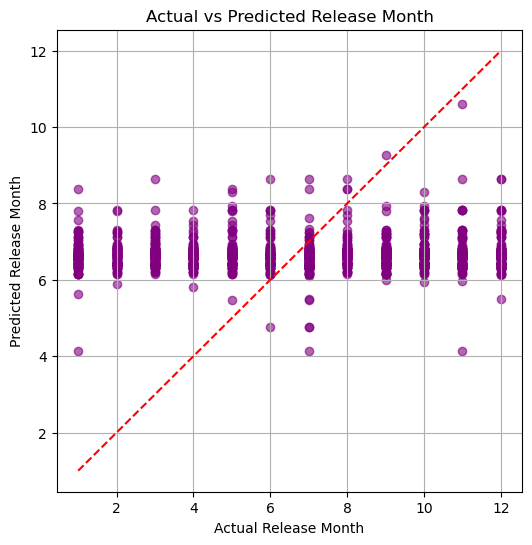

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, preds, alpha=0.6, color='purple')
plt.plot([1, 12], [1, 12], 'r--')  # Perfect prediction line
plt.xlabel("Actual Release Month")
plt.ylabel("Predicted Release Month")
plt.title("Actual vs Predicted Release Month")
plt.grid(True)
plt.show()


## 📌 Project Summary

- Dataset cleaned, key features extracted
- Most common genre: International TV Shows
- Genre model accuracy: 36.2%
- Hit prediction accuracy: 71.3%
- Release month RMSE: 3.45
- Data suggests Netflix content spikes in September/October

### 🚀 Next Steps
- Use BERT for better NLP genre prediction
- Use IMDb scores if available for hit labels
- Deploy a Streamlit app with filters by genre, rating, and predicted hits
